# 최종 PDF에 포함된 코드들입니다.

## 데이터 불러오기

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_nodouble.csv",lineterminator='\n')

df_unique = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_nodouble_unique.csv",lineterminator='\n')
df_2017_unique = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_2017unique.csv",lineterminator='\n')

In [6]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df_unique['trending_date'] = pd.to_datetime(df_unique['trending_date'])
df_unique['publishedAt'] = pd.to_datetime(df_unique['publishedAt'])
df_2017_unique['trending_date'] = pd.to_datetime(df_2017_unique['trending_date'])
df_2017_unique['publishedAt'] = pd.to_datetime(df_2017_unique['publishedAt'])

In [7]:
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\MALGUNSL.TTF'  # 폰트는 맑은고딕으로 통일하여 사용함.
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

Malgun Gothic


## 2017-2018 인기동영상의 조회수와 2020-2022 인기동영상의 조회수 분포 비교 (p.4)

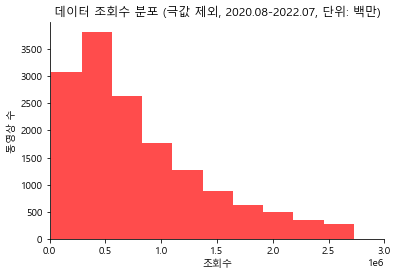

In [161]:
plt.hist(data = df_unique[df_unique['view_count']<np.percentile(df_unique['view_count'],90)], x='view_count',color='red',alpha=0.7)
ax = plt.gca()
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
#ax.spines['left'].set_visible(False) #위 테두리 제거
plt.xlabel('조회수')
plt.ylabel('동영상 수')
plt.title('데이터 조회수 분포 (극값 제외, 2020.08-2022.07, 단위: 백만)', fontsize = 12)
plt.xlim([0,3000000])


plt.show()

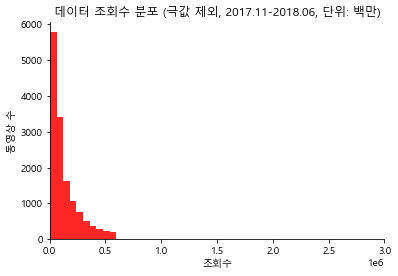

In [163]:
plt.hist(data = df_2017_unique[df_2017_unique['view_count']<np.percentile(df_2017_unique['view_count'],90)], x='view_count',color='red',alpha=0.85)
ax = plt.gca()
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
#ax.spines['left'].set_visible(False) #위 테두리 제거
plt.xlabel('조회수')
plt.ylabel('동영상 수')
plt.title('데이터 조회수 분포 (극값 제외, 2017.11-2018.06, 단위: 백만)', fontsize = 12)
plt.xlim([0,3000000])
plt.show()

## 채널의 구독자수 분포 (p.10)

### 전처리

In [135]:
channel2858 = pd.read_csv('C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\channel2858.csv')

In [136]:
channel_unique = pd.DataFrame(columns=['channelId','trending_date'])
for i in range(len(df_unique['channelId'].unique())):
  ha = df_unique[df_unique['channelId']==df_unique['channelId'].unique()[i]].tail(1)
  channel_unique = channel_unique.append(ha[['channelId','trending_date']], ignore_index=True)

In [137]:
channel_sub = channel2858[['channelId','subscriber']]

In [138]:
channel_unique = channel_unique.merge(channel_sub, on='channelId')
len(channel_unique)

2858

### 그래프

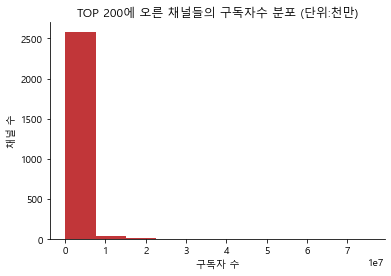

In [29]:
custom_palette = sns.color_palette("RdGy")
sns.set_palette(custom_palette)
plt.hist(data = channel_unique, x='subscriber')
ax = plt.gca()
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
plt.xlabel('구독자 수')
plt.ylabel('채널 수')
plt.title('TOP 200에 오른 채널들의 구독자수 분포 (단위:천만)',fontsize = 12, color = 'black')
plt.show()

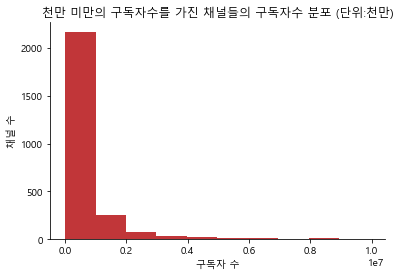

In [152]:
plt.hist(data = channel_unique[channel_unique['subscriber']<9999999], x='subscriber')
ax = plt.gca()
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
plt.xlabel('구독자 수')
plt.ylabel('채널 수')
plt.title('천만 미만의 구독자수를 가진 채널들의 구독자수 분포 (단위:천만)',fontsize = 12, color = 'black')
plt.show()

In [164]:
len(channel_unique[channel_unique['subscriber']<9999999])

2598

## 채널의 개설연도 분포 (p.10)  
바로 위에서 진행된 전처리를 진행한 뒤에 코드를 실행하여야 작동합니다.

### 전처리

In [139]:
channel_open = channel2858[['channelId','open','totalview']]

In [140]:
channel_unique = channel_unique.merge(channel_open, on='channelId')

In [141]:
# 개설연도를 추출하기 위해 datatype을 datetime으로 변경
channel_unique['open'] = pd.to_datetime(channel_unique['open'])

In [142]:
channel_unique['trending_date'] = pd.to_datetime(channel_unique['trending_date'])

In [143]:
# 개설연도를 추출하여 새로운 열로 추가
channel_unique['open_year'] = channel_unique['open'].dt.year

In [144]:
channel_unique['open_year']

0       2014.0
1       2016.0
2       2014.0
3       2016.0
4       2008.0
         ...  
2853    2020.0
2854    2018.0
2855    2014.0
2856    2017.0
2857    2014.0
Name: open_year, Length: 2858, dtype: float64

In [145]:
# unique한 개설연도가 무엇이 있는지 확인
channel_unique['open_year'].unique()

array([2014., 2016., 2008., 2015., 2013., 2018., 2020., 2011., 2012.,
       2019.,   nan, 2017., 2007., 2009., 2006., 2010., 2005., 2021.,
       2022.])

### 그래프

<ipython-input-149-00f87c4271bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data=channel_unique[channel_unique['trending_date'].dt.year==2022][channel_unique['open_year']!=2022], x='open_year',


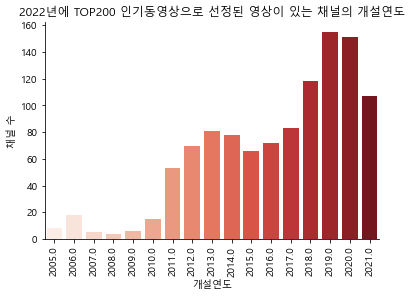

In [149]:
# 2022년에 trending video로 오른 채널들에 대해서 개설연도의 분포를 확인

sns.countplot(data=channel_unique[channel_unique['trending_date'].dt.year==2022][channel_unique['open_year']!=2022], x='open_year',
              palette='Reds'
             ) # 각 조각의 색깔
ax = plt.gca()
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
plt.xlabel('개설연도')
plt.ylabel('채널 수')
plt.xticks(rotation= 90)
plt.title('2022년에 TOP200 인기동영상으로 선정된 영상이 있는 채널의 개설연도', fontsize=12)
plt.show()

## TOP 200에 선정된 영상들의 카테고리 분포 (p.11)

### 막대그래프

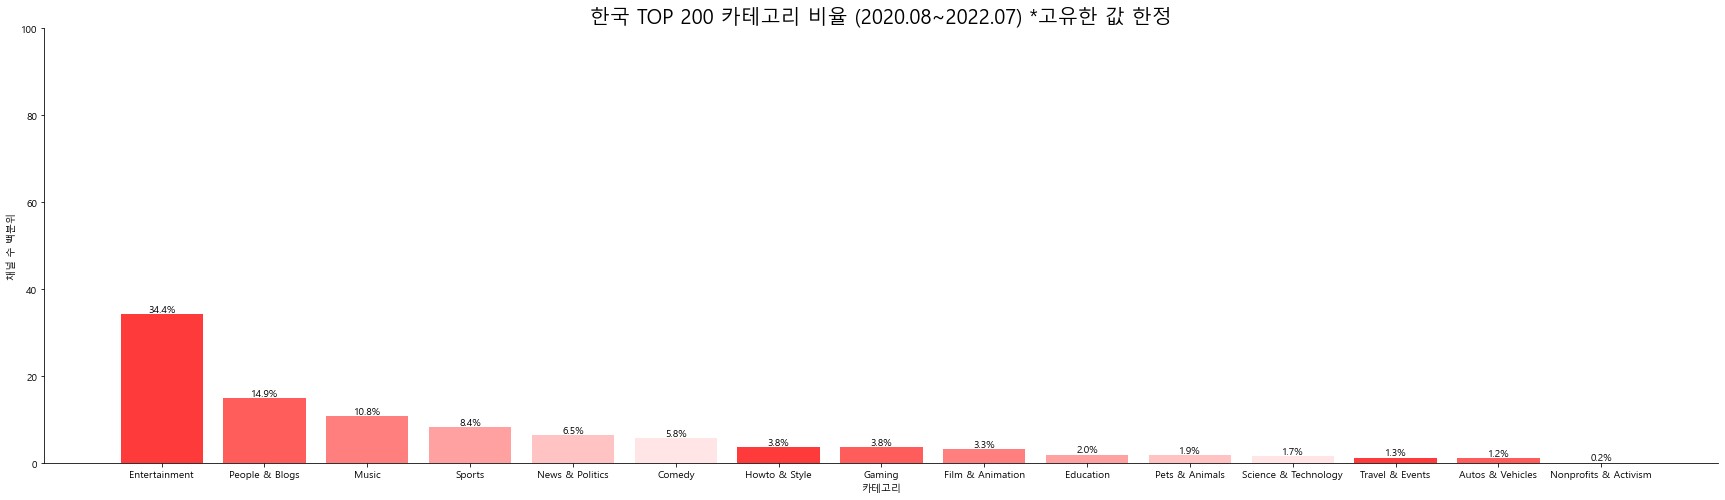

In [151]:
colors = sns.light_palette("#FF3A3A", reverse=True)
cat = df_unique.groupby('category_name',as_index=False)['video_id'].count()
cat['ratio'] = cat['video_id'].div(len(df_unique)/100)
cat_sort = cat.sort_values('ratio',ascending = False)


plt.figure(figsize=(30,8))
x = np.arange(len(cat_sort.category_name.unique()))
a = plt.bar(x, height = cat_sort['ratio'], color=colors) #color= #edgecolot = 
ax = plt.gca()
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
plt.xlabel('카테고리')
plt.ylabel('채널 수 백분위')
plt.xticks(x, cat_sort['category_name'], fontsize = 10)
plt.title('한국 TOP 200 카테고리 비율 (2020.08~2022.07) *고유한 값 한정',fontsize = 20)
plt.ylim([0,100])
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 10)
plt.show()

### 원그래프

In [97]:
short_count = df_unique['category_name'].value_counts(normalize=True) 
short_count#10일 이상 인기를 유지한 동영상들은 어떤 카테고리들이었나?

Entertainment            0.343750
People & Blogs           0.149338
Music                    0.108046
Sports                   0.083885
News & Politics          0.065217
Comedy                   0.058129
Howto & Style            0.037984
Gaming                   0.037512
Film & Animation         0.032904
Education                0.020026
Pets & Animals           0.019022
Science & Technology     0.017250
Travel & Events          0.012878
Autos & Vehicles         0.012169
Nonprofits & Activism    0.001890
Name: category_name, dtype: float64

In [106]:
sizes = [short_count[0],short_count[1], short_count[2],short_count[3],short_count[4],short_count[5],short_count[6],short_count[7]+short_count[8]+short_count[9]+short_count[10]+short_count[11]+short_count[12]+short_count[13]+short_count[14]] # 각 조각의 크기
labels = ['Entertainment','People & Blogs', 'Music', 'Sports','News & Politics','Comedy','Howto & Style','etc'] # 각 조각의 이름
colors = ['#FF3A3A', '#FF5B52', '#FF796A','#FF9784','#FFB49E','#FFD2B9','#FFF0D5','#FFFFF2'] # 각 조각의 색깔
explodes = (0.1, 0.1, 0.1,0.1,0,0,0,0) # 첫 번째 조각에 대해서 0.1만큼의 간격 부여. 0은 간격 없음. default = 0.

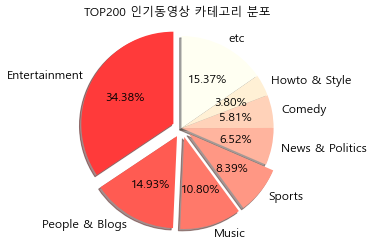

In [107]:
plt.pie(sizes,
        labels = labels,
        colors = colors,
        explode = explodes, # 각 조각 간의 간격 지정
        autopct = "%1.2f%%", # 우리가 부여한 숫자(sizes)를 알아서 퍼센트로 변환. 그 퍼센트의 소숫점 자릿수를 지정.
        shadow = True,
        startangle = 90, # 시작 각도
        textprops = {'fontsize':12}) # 글자 크기
plt.axis('equal') # x축과 y축의 길이를 동일하게 해줘
plt.title('TOP200 인기동영상 카테고리 분포')
plt.show()

## 동영상 발행시간 분포 (p.33~34)

### 전처리

In [108]:
# 데이터의 publishedAt은 모두 UTC이므로, 한국 시간에 맞추어 변경
from datetime import datetime, timedelta
df_unique['publishedAt'] = df_unique['publishedAt'] + timedelta(hours=9) 
df_unique['hour'] = df_unique['publishedAt'].dt.hour
print(df_unique['hour'])

0        18
1        18
2        18
3         0
4        18
         ..
16923    20
16924    19
16925    19
16926    18
16927    18
Name: hour, Length: 16928, dtype: int64


In [112]:
df_hour_only = df_unique.groupby('hour',as_index=False).count()[['video_id','hour']]

In [111]:
df_hour_only

,video_id,hour,category_name
0,452,0,452
1,147,1,147
2,74,2,74
3,65,3,65
4,68,4,68
5,45,5,45
6,137,6,137
7,217,7,217
8,314,8,314
9,423,9,423


### 전체 영상에 대한 발행시간 분포

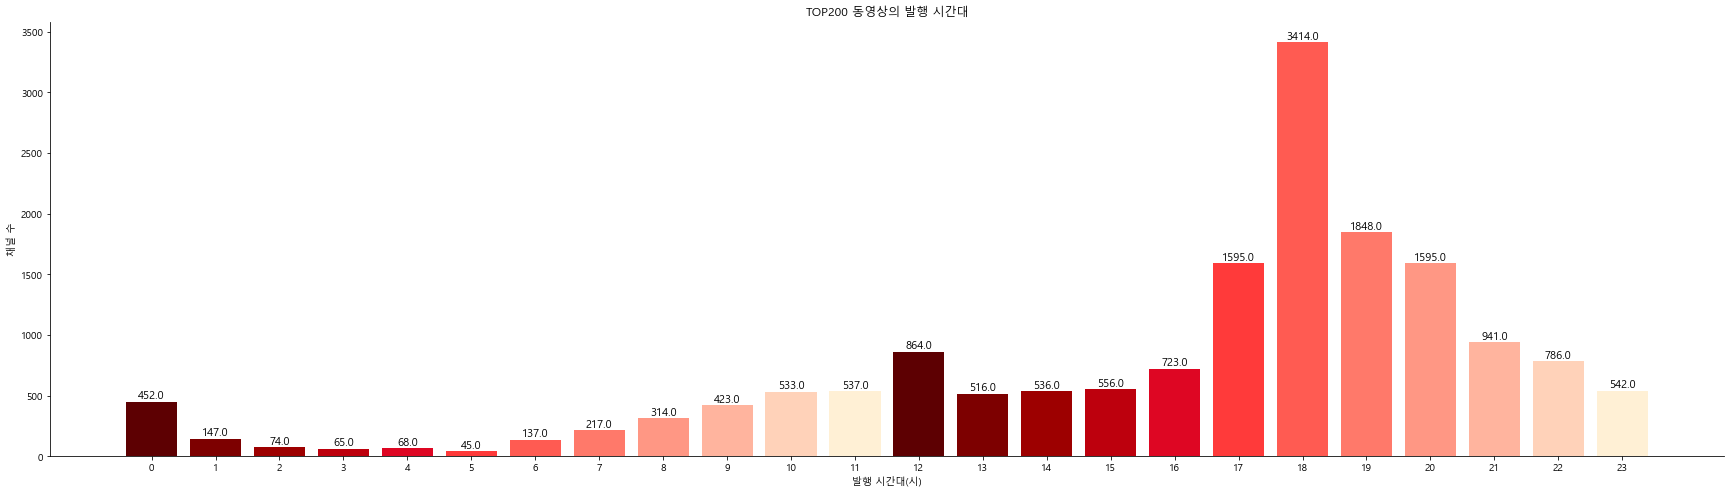

In [114]:
plt.figure(figsize=(30,8))
colors = ['#5D0002','#7D0000','#9D0000','#BD000D','#DE0623','#FF3A3A', '#FF5B52', '#FF796A','#FF9784','#FFB49E','#FFD2B9','#FFF0D5'] # 각 조각의 색깔
x = np.arange(len(df_hour_only.hour.unique()))
a = plt.bar(x, height = df_hour_only['video_id'], color=colors) #color= #edgecolot = 
plt.xticks(x, df_hour_only['hour'], fontsize = 10)
ax = plt.gca()
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
plt.xlabel('발행 시간대(시)')
plt.ylabel('채널 수')
plt.title('TOP200 동영상의 발행 시간대',fontsize = 12)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

### 카테고리별 발행시간 분포

Entertainment


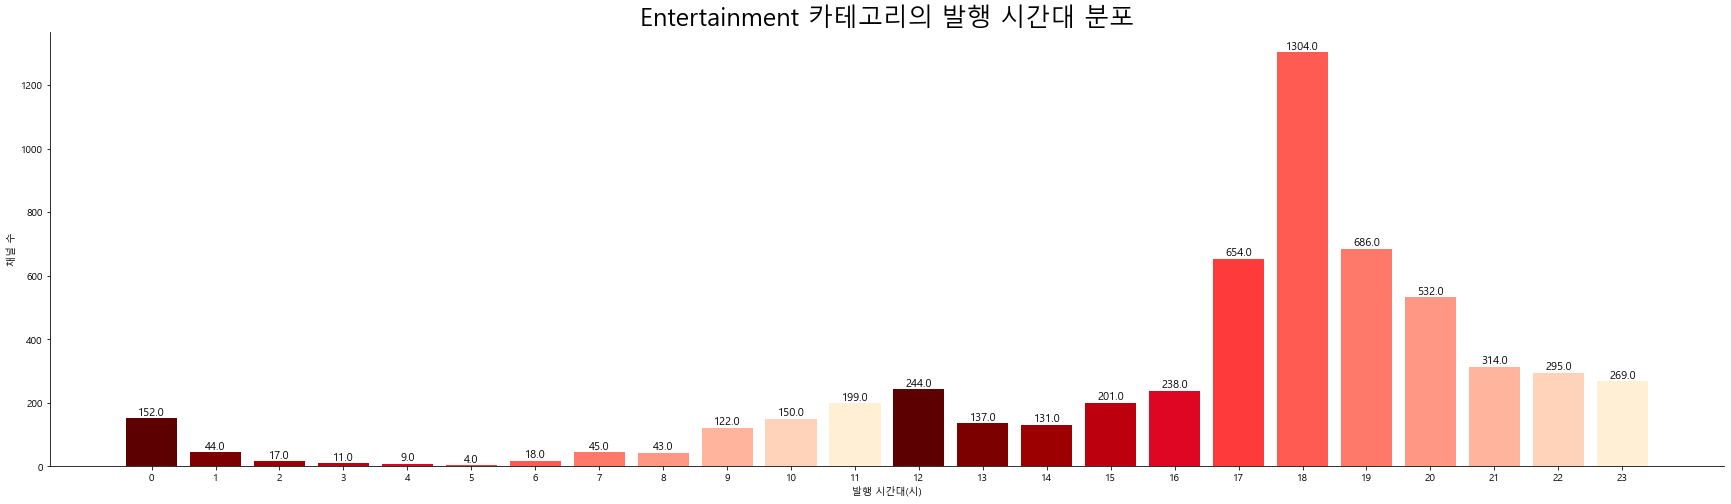

Film & Animation


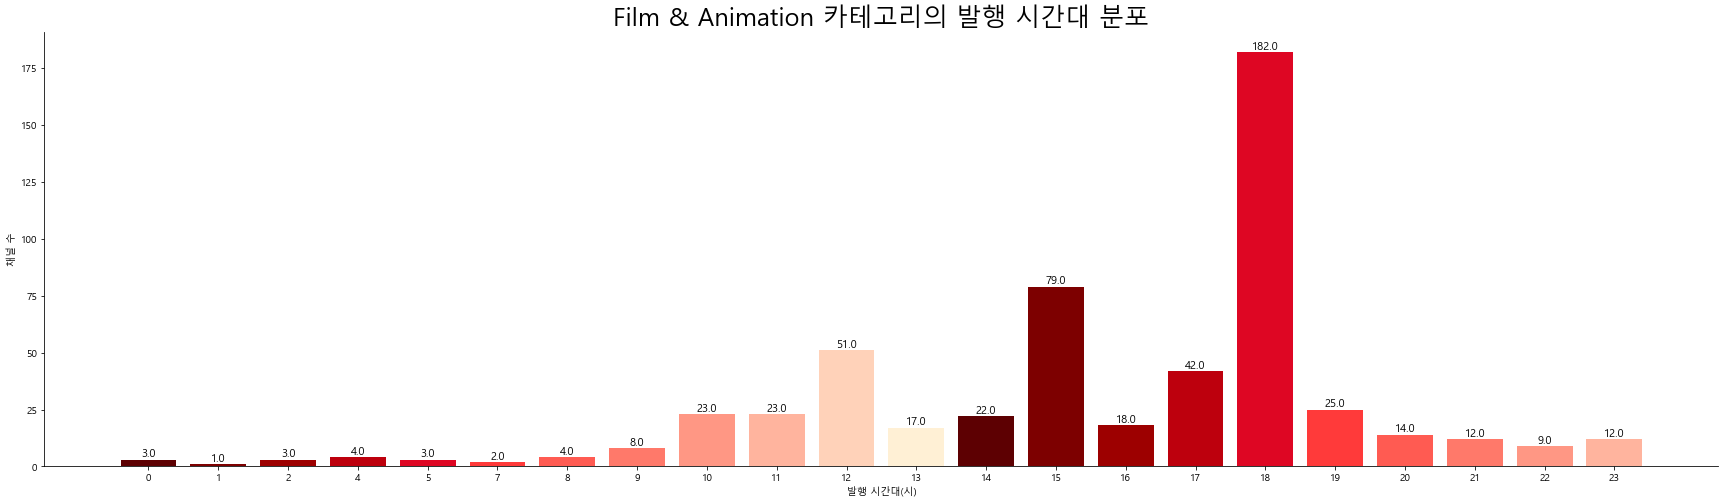

People & Blogs


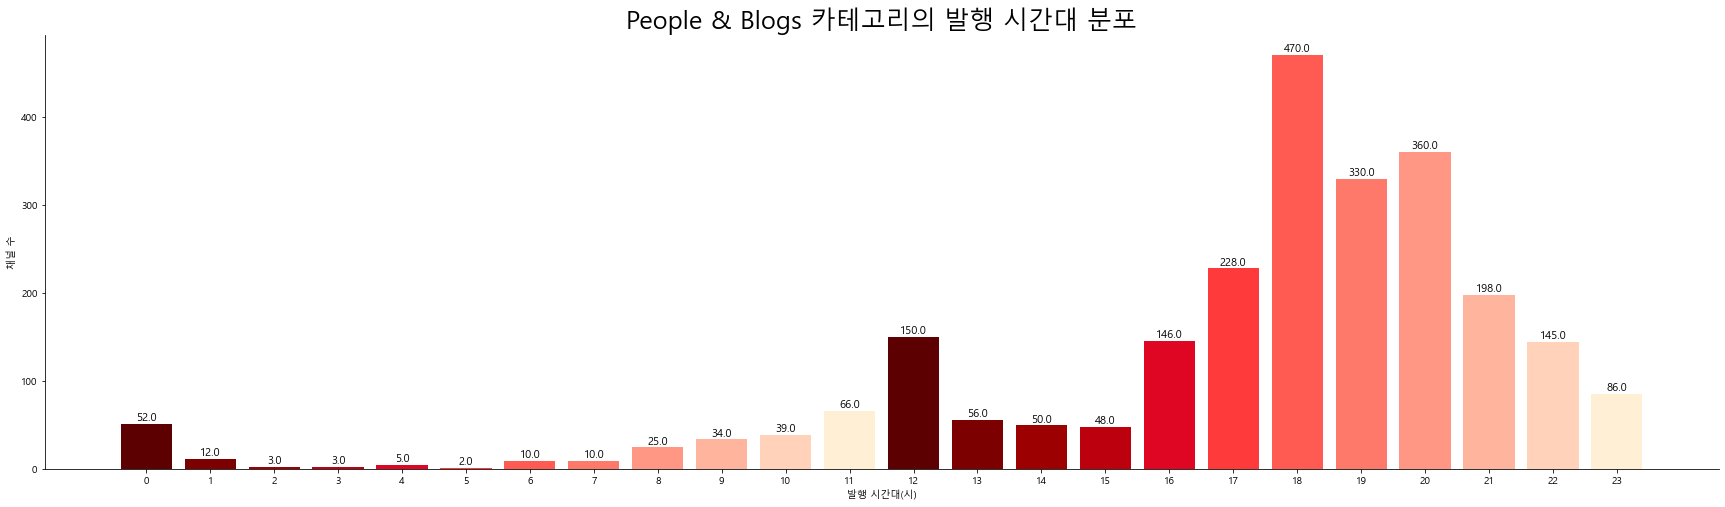

Music


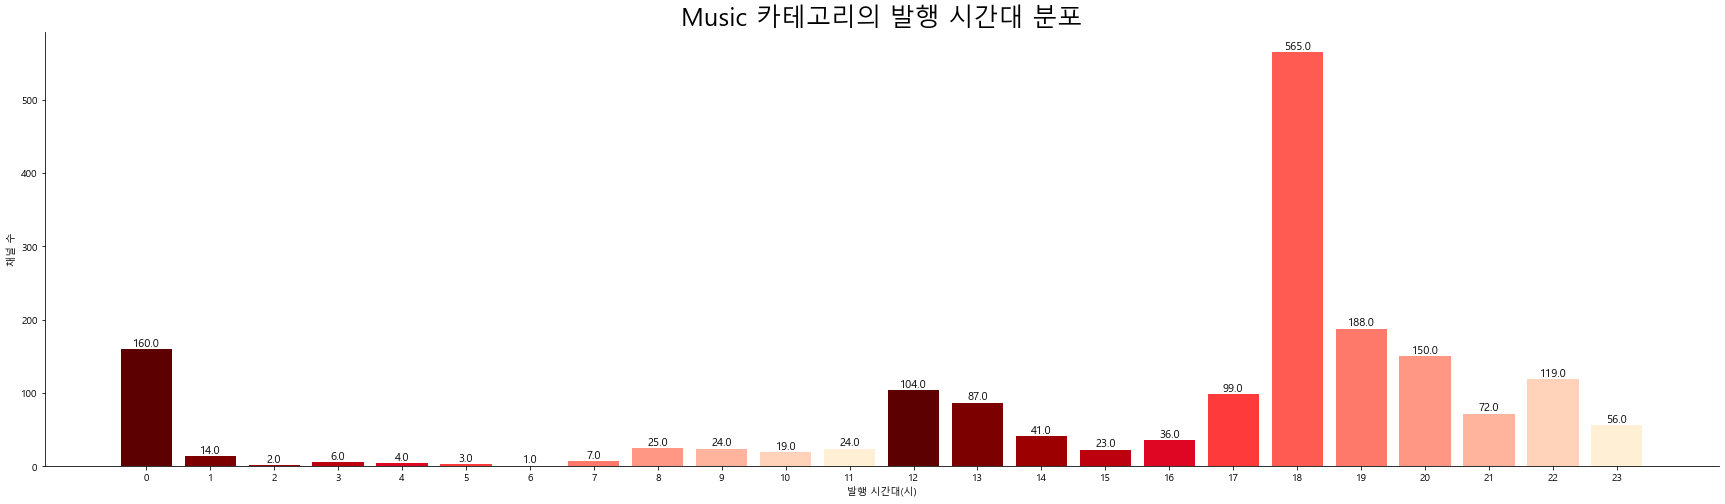

Comedy


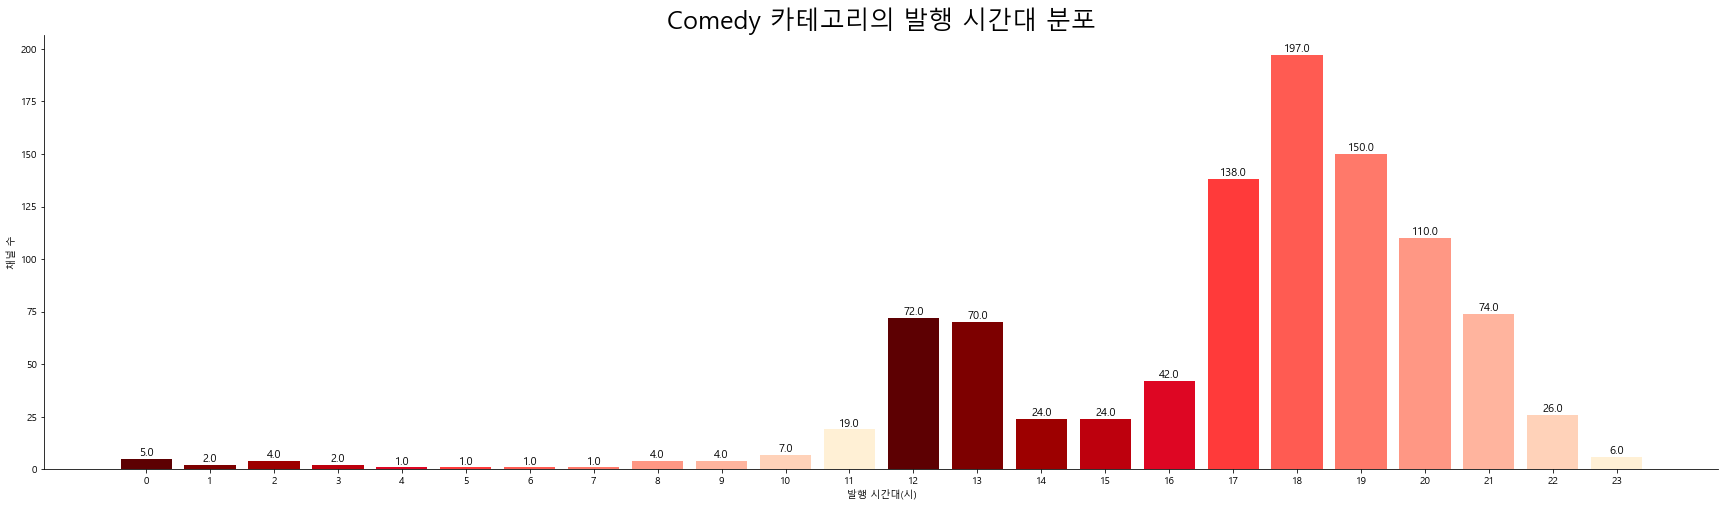

Education


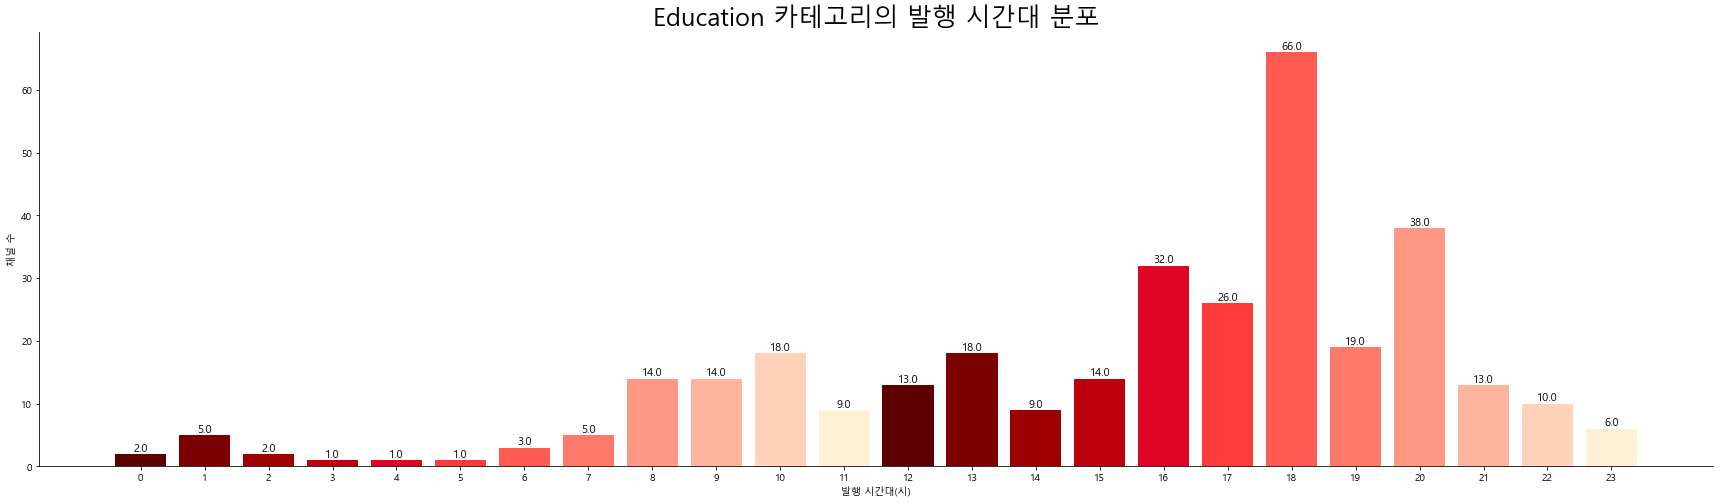

News & Politics


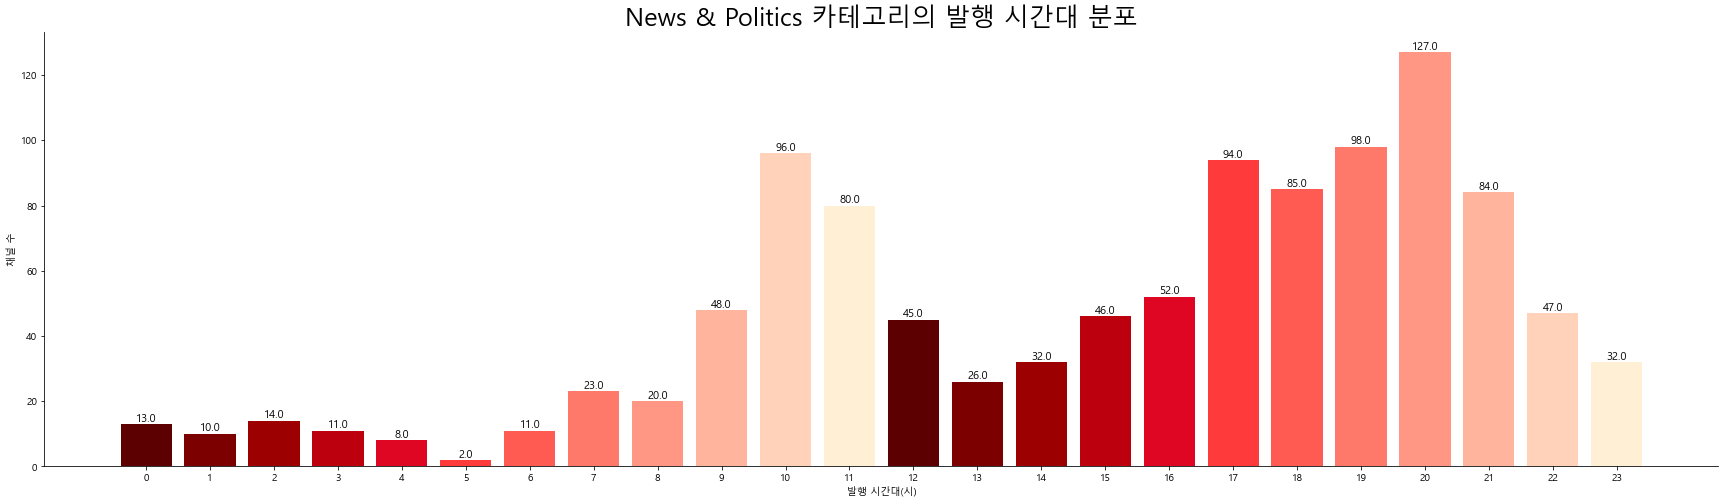

Sports


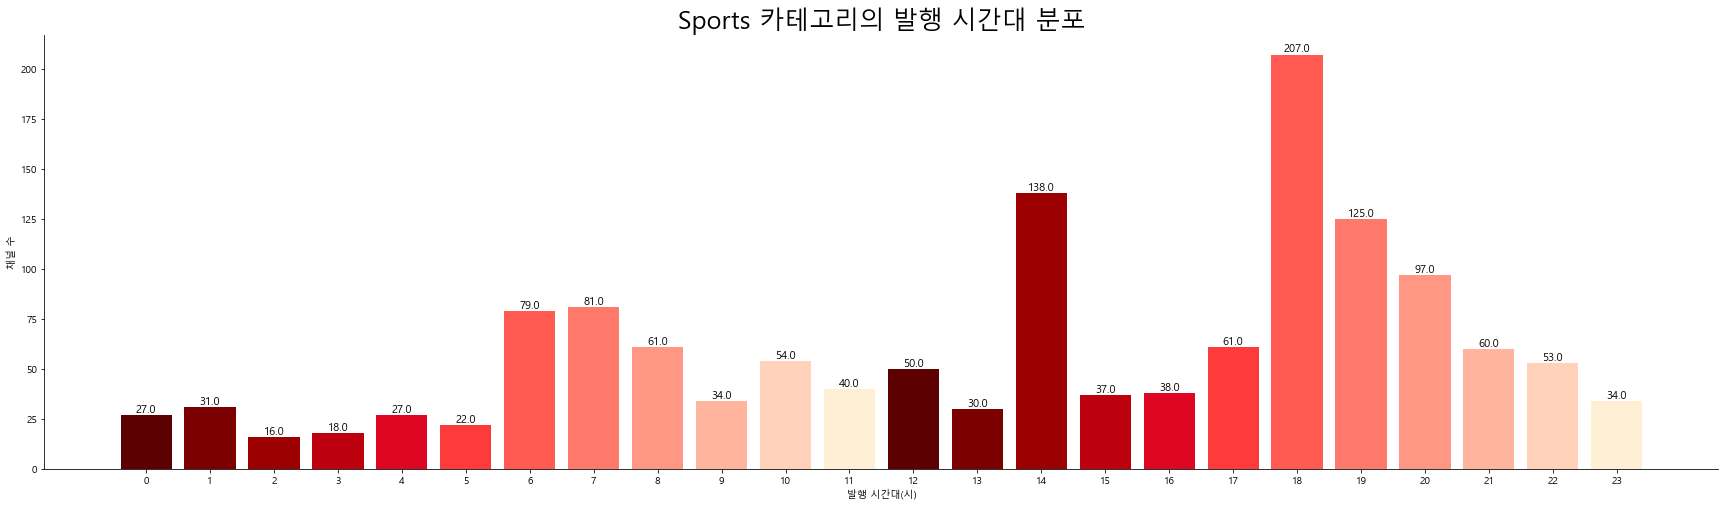

Nonprofits & Activism


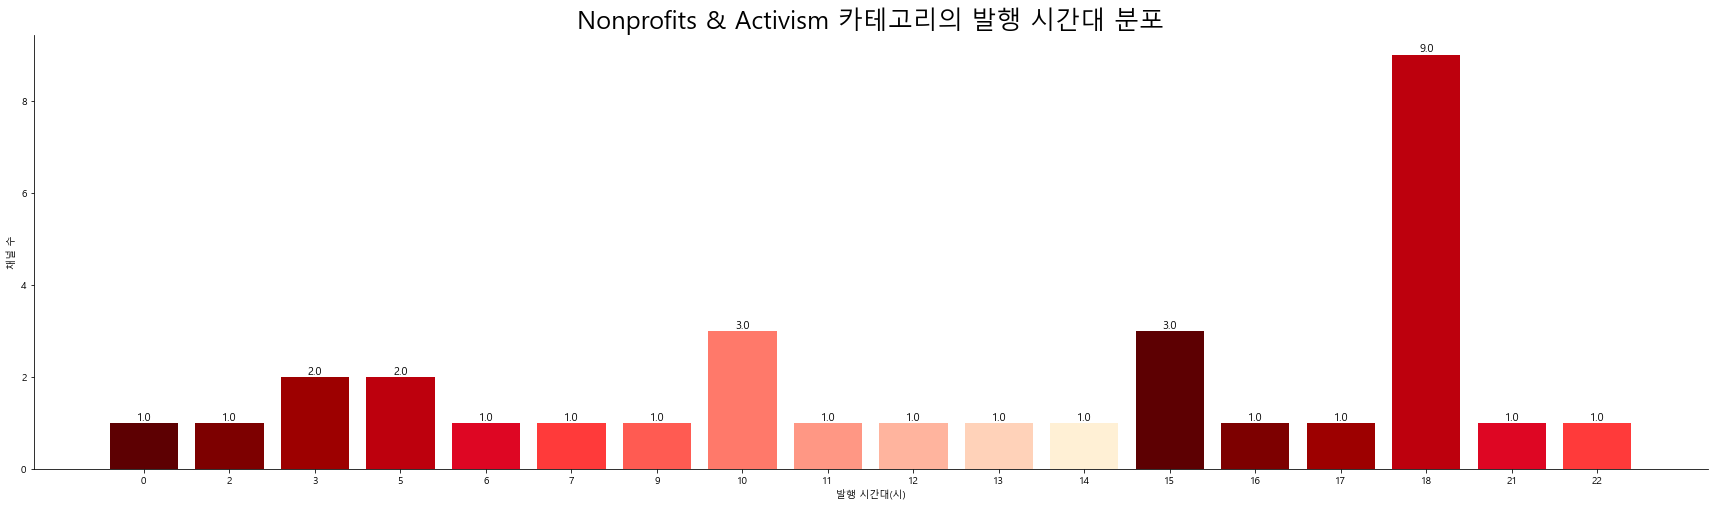

Gaming


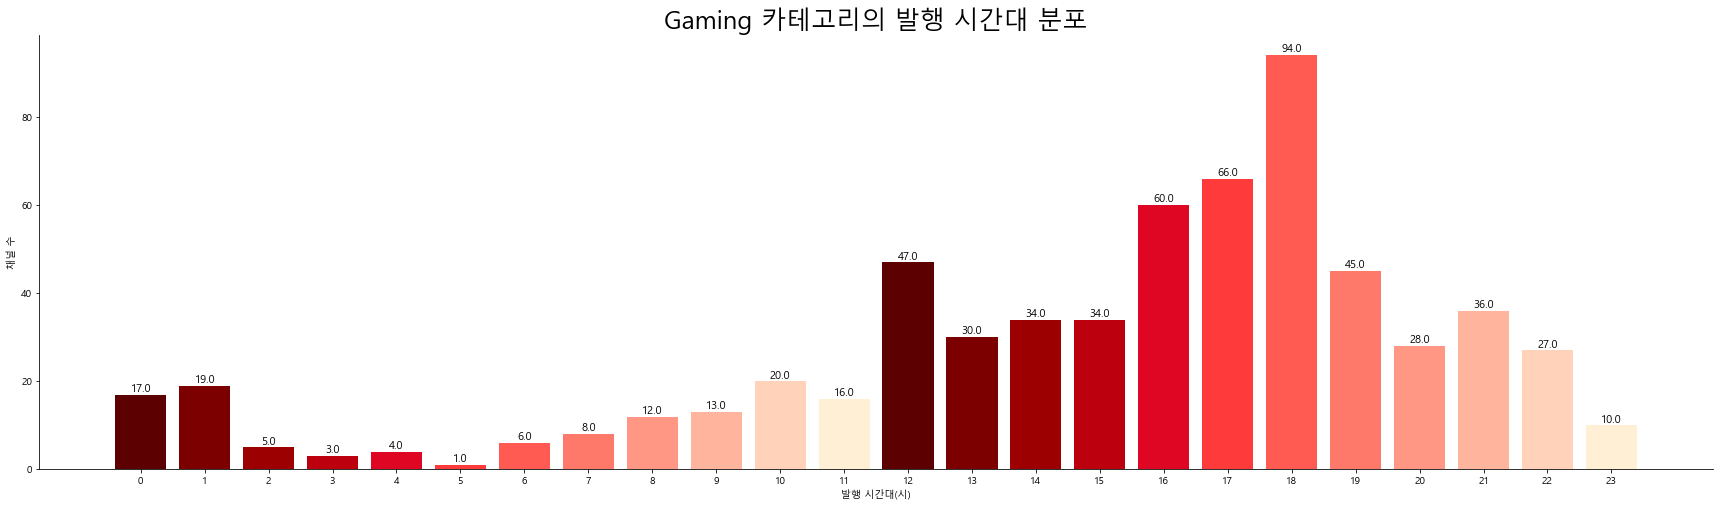

Travel & Events


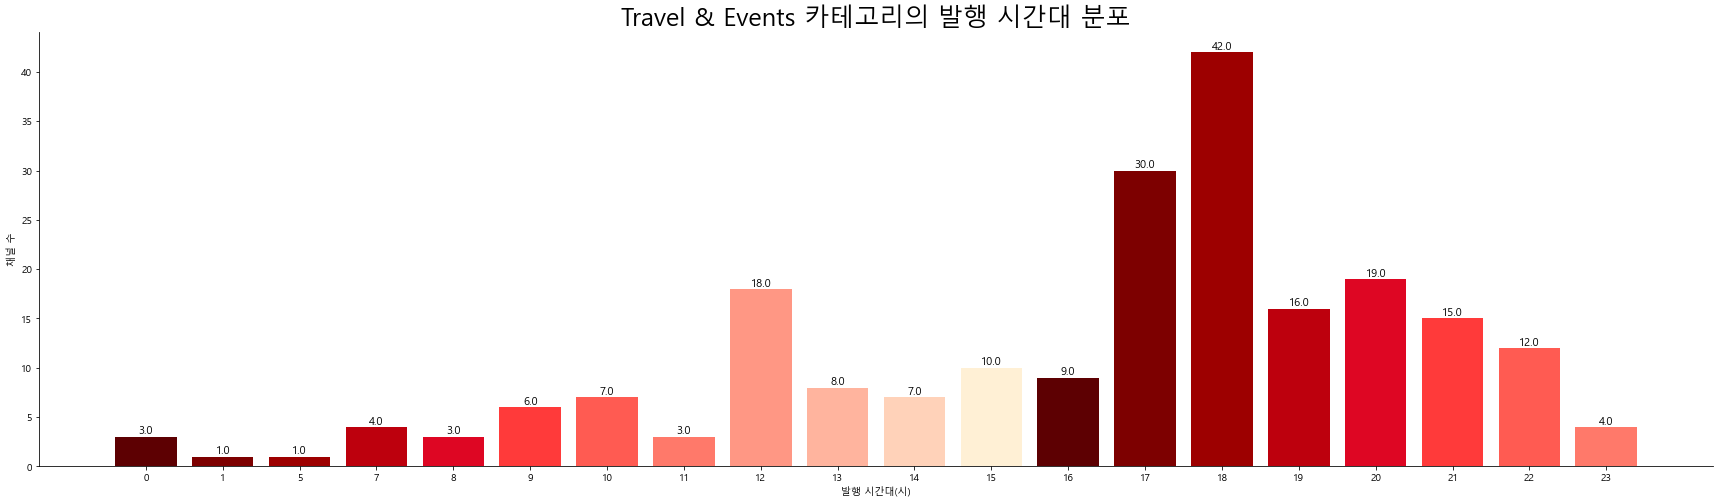

Pets & Animals


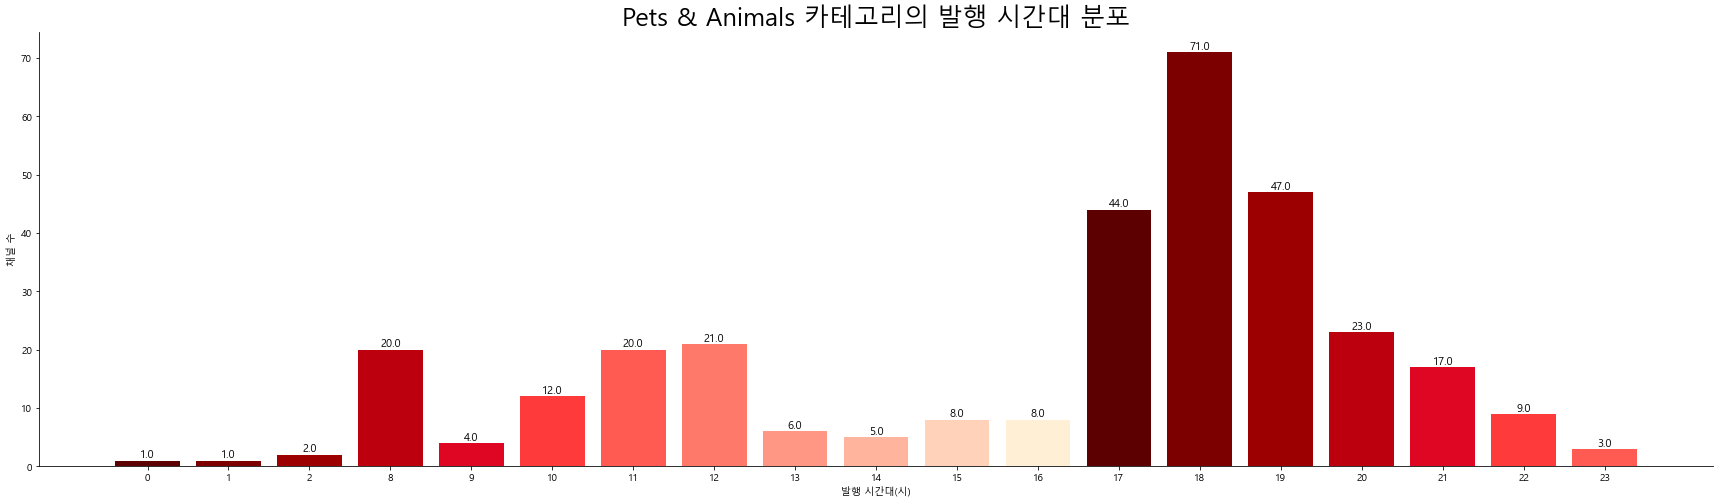

Science & Technology


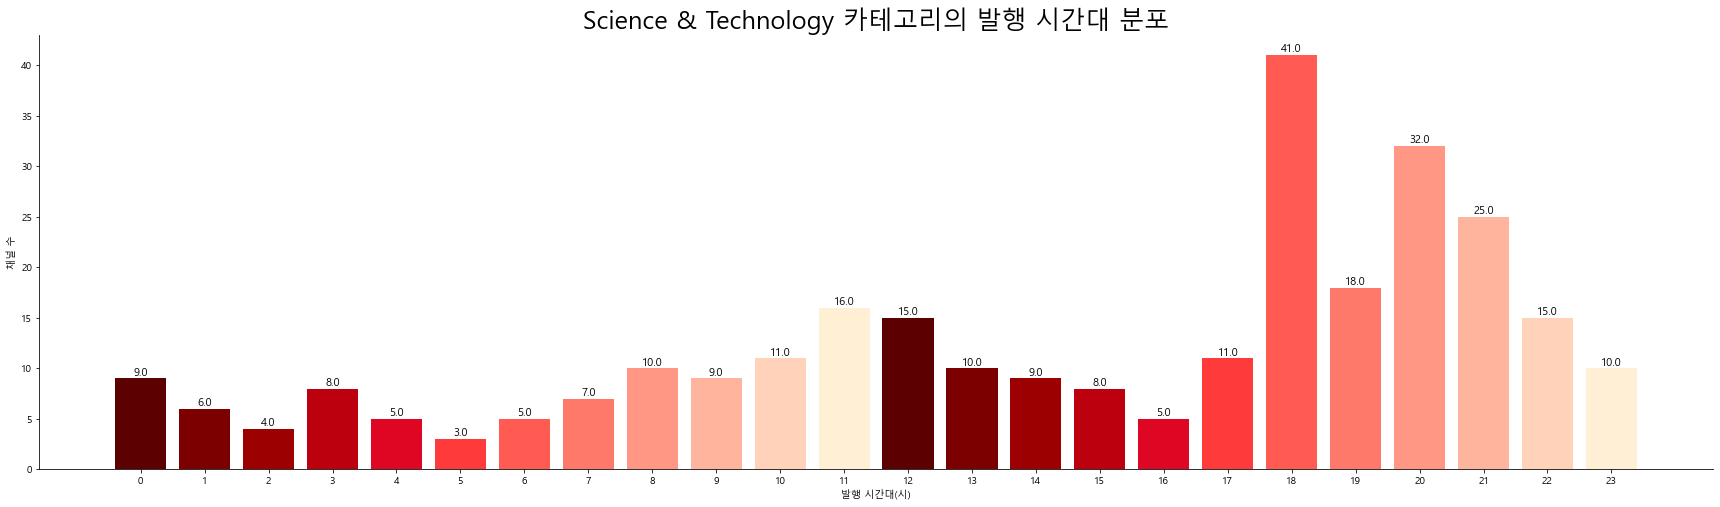

Howto & Style


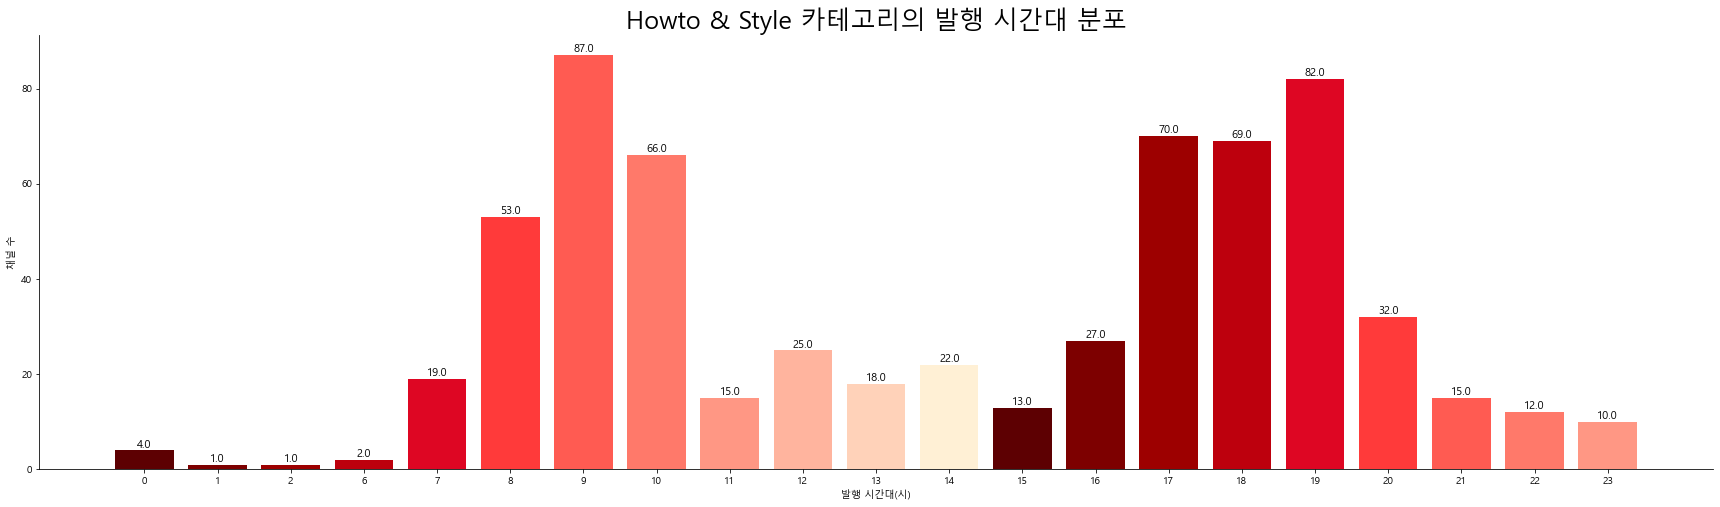

Autos & Vehicles


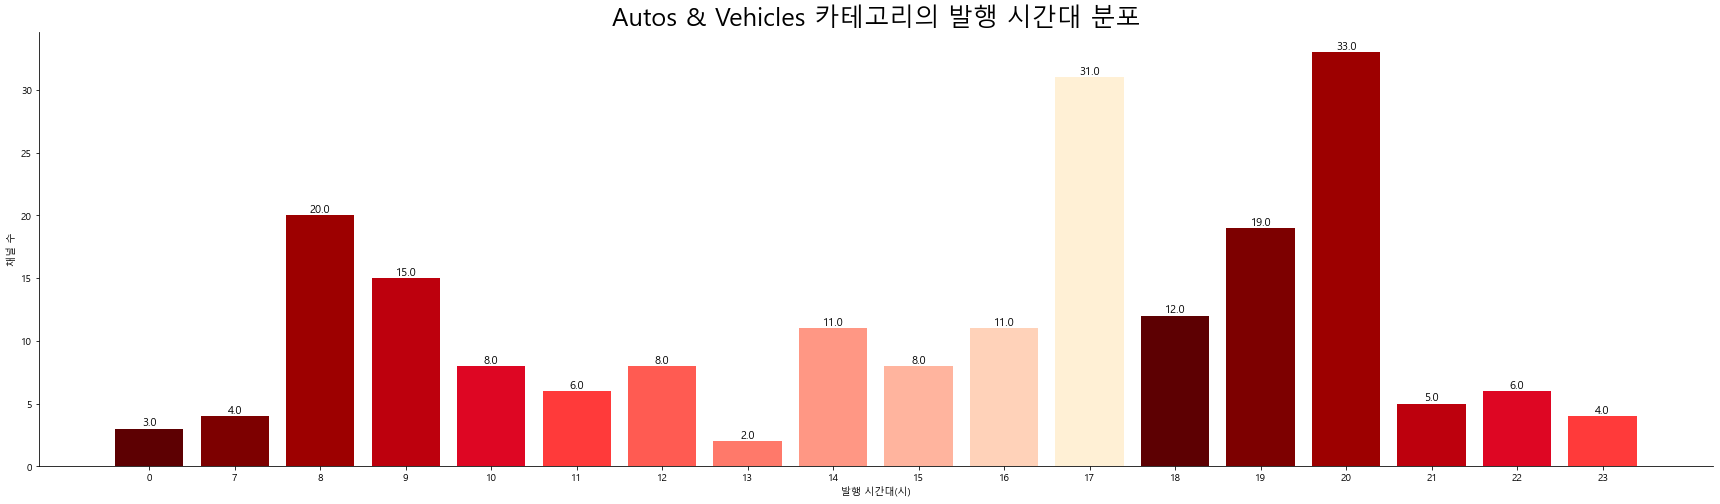

In [117]:
for cat in df_unique['category_name'].unique():
    df_cat = df_unique[df_unique['category_name']==cat]
    df_hour_only = df_cat.groupby('hour',as_index=False).count()[['video_id','hour','category_name']]
    print(cat)
    plt.figure(figsize=(30,8))
    x = np.arange(len(df_hour_only.hour.unique()))
    a = plt.bar(x, height = df_hour_only['video_id'], color=colors) #color= #edgecolot = 
    ax = plt.gca()
    ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
    ax.spines['top'].set_visible(False) #위 테두리 제거
    plt.xlabel('발행 시간대(시)')
    plt.ylabel('채널 수')
    plt.xticks(x, df_hour_only['hour'], fontsize = 10)
    
    plt.title('%s 카테고리의 발행 시간대 분포'%cat ,fontsize = 25)
    for rect in a:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
    plt.show()